In [1]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

In [3]:
df = pd.DataFrame(pd.read_csv("C:\\Users\\sai charan\\Desktop\\ML_Project_1//AutoData (1).csv"))
df.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.shape
# Data has 26 columns and 205 rows.

(205, 25)

In [5]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
df.columns


Index(['symboling', 'make', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

Data Cleaning

In [23]:
#checking duplicates
sum(df.duplicated(subset = 'make')) == 0
# No duplicate values

False

In [9]:
# Checking Null values
df.isnull().sum()*100/df.shape[0]
# There are no NULL values in the dataset, hence it is clean

symboling           0.0
make                0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [10]:
df.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Density'>

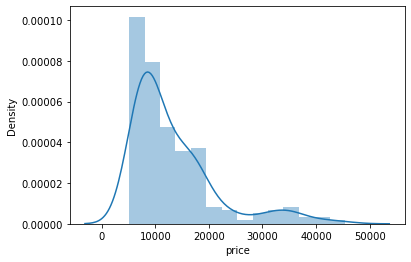

In [11]:
sns.distplot(df['price'])

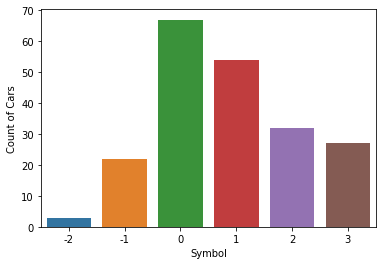

<Figure size 432x288 with 0 Axes>

In [12]:
plt1 = sns.countplot(df['symboling'])
plt1.set(xlabel = 'Symbol', ylabel= 'Count of Cars')
plt.show()
plt.tight_layout()

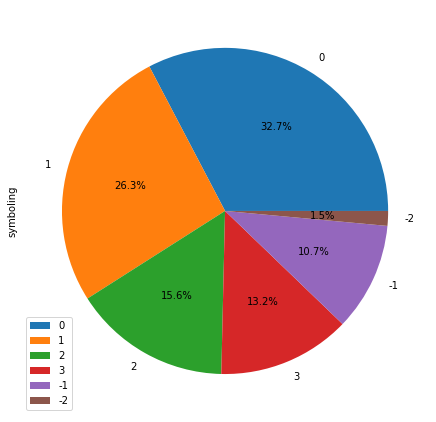

<Figure size 432x288 with 0 Axes>

In [13]:
df_sym = pd.DataFrame(df['symboling'].value_counts())
df_sym.plot.pie(subplots=True,labels = df_sym.index.values, autopct='%1.1f%%', figsize = (15,7.5))
# Unsquish the pie.
plt.gca().set_aspect('equal')
plt.show()
plt.tight_layout()

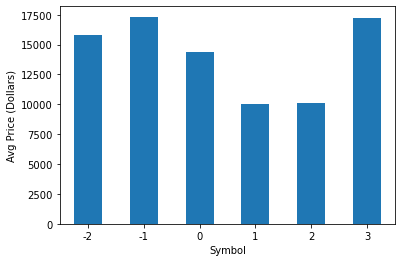

In [14]:
plt1 = df[['symboling','price']].groupby("symboling").mean().plot(kind='bar',legend = False,)
plt1.set_xlabel("Symbol")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()


In [15]:
# Inference
# More than 50% of cars are with symbol 0 or 1.
# Average price of car is lower for 0,1 & 2 symbol category.

Car Name

In [21]:
df.make.values[0:10]

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 100ls', 'audi 5000', 'audi 4000',
       'audi 5000s (diesel)'], dtype=object)

In [17]:
# It is observed that Car Name consists of two parts 'car company' + ' ' + 'Car Model'
# Let's split out car company to a new column.

In [22]:
df['brand'] = df.make.str.split(' ').str.get(0).str.upper()

In [24]:
len(set(df.brand.values))

27

In [25]:
# Let's see companies and their no of models.

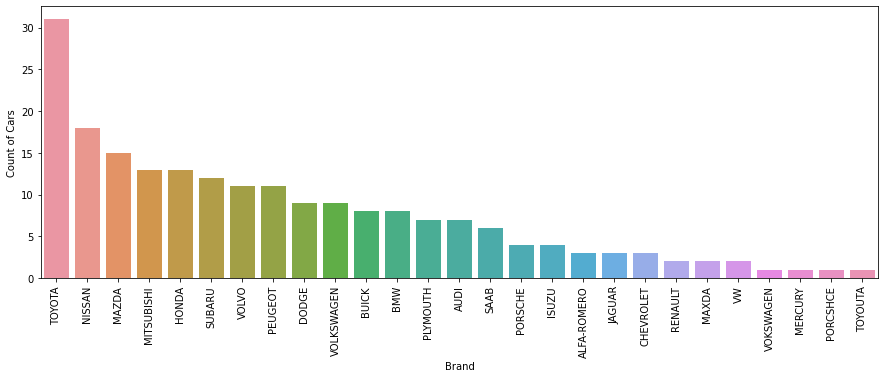

<Figure size 432x288 with 0 Axes>

In [26]:
fig, ax = plt.subplots(figsize = (15,5))
plt1 = sns.countplot(df['brand'], order=pd.value_counts(df['brand']).index,)
plt1.set(xlabel = 'Brand', ylabel= 'Count of Cars')
xticks(rotation = 90)
plt.show()
plt.tight_layout()

In [27]:
# It's noticed that in brand names,
# VOLKSWAGON has three different values as VOLKSWAGEN, VOKSWAGEN and VW
# MAZDA is also spelled as MAXDA
# PORSCHE as PORSCHE and PORCSCHE.
# Let's fix these data issues.
df['brand'] = df['brand'].replace(['VW', 'VOKSWAGEN'], 'VOLKSWAGEN')
df['brand'] = df['brand'].replace(['MAXDA'], 'MAZDA')
df['brand'] = df['brand'].replace(['PORCSHCE'], 'PORSCHE')
df['brand'] = df['brand'].replace(['TOYOUTA'], 'TOYOTA')

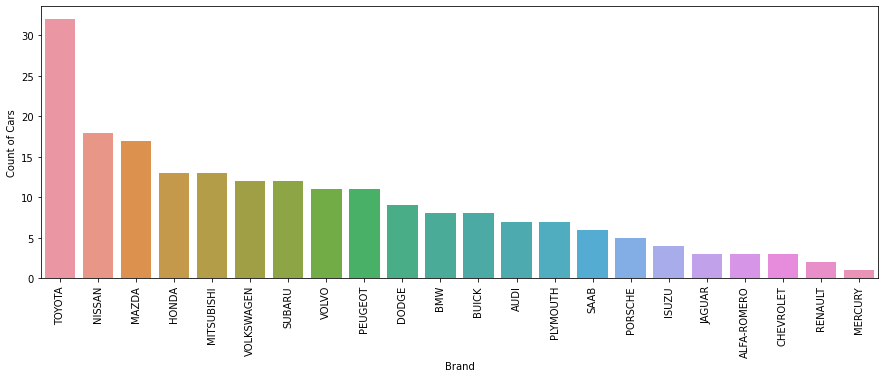

<Figure size 432x288 with 0 Axes>

In [28]:
fig, ax = plt.subplots(figsize = (15,5))
plt1 = sns.countplot(df['brand'], order=pd.value_counts(df['brand']).index,)
plt1.set(xlabel = 'Brand', ylabel= 'Count of Cars')
xticks(rotation = 90)
plt.show()
plt.tight_layout()

In [29]:
df.brand.describe()

count        205
unique        22
top       TOYOTA
freq          32
Name: brand, dtype: object

In [30]:
# Inference
# Toyota, a Japanese company has the most no of models.

In [31]:
# Let's see average car price of each company.

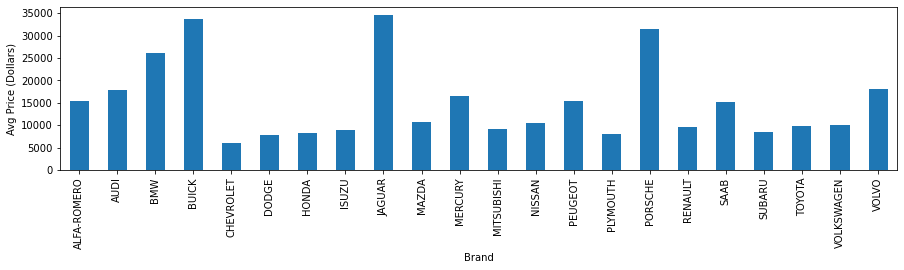

In [32]:
df_comp_avg_price = df[['brand','price']].groupby("brand", as_index = False).mean().rename(columns={'price':'brand_avg_price'})
plt1 = df_comp_avg_price.plot(x = 'brand', kind='bar',legend = False, sort_columns = True, figsize = (15,3))
plt1.set_xlabel("Brand")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 90)
plt.show()

In [33]:
#df_comp_avg_price


In [34]:
df = df.merge(df_comp_avg_price, on = 'brand')

In [35]:
df['brand_category'] = df['brand_avg_price'].apply(lambda x : "Budget" if x < 10000 
                                                     else ("Mid_Range" if 10000 <= x < 20000
                                                           else "Luxury"))

In [36]:
# Inference:
# Toyota has considerably high no of models in the market.
# Brands can be categorised as Luxury, Mid Ranged, Budget based on their average price.
# Some of the Luxury brans are


Fuel Type

In [37]:
# Let's see how price varies with  Fuel Type

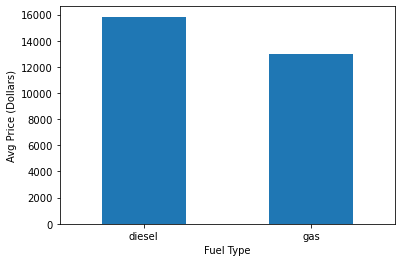

In [38]:
df_fuel_avg_price = df[['fueltype','price']].groupby("fueltype", as_index = False).mean().rename(columns={'price':'fuel_avg_price'})
plt1 = df_fuel_avg_price.plot(x = 'fueltype', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Fuel Type")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

In [39]:
# Inference
# Diesel cars are priced more than gas cars.

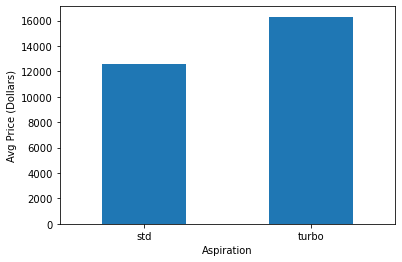

In [40]:
df_aspir_avg_price = df[['aspiration','price']].groupby("aspiration", as_index = False).mean().rename(columns={'price':'aspir_avg_price'})
plt1 = df_aspir_avg_price.plot(x = 'aspiration', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Aspiration")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

# Inference
# Cars with turbo aspiration engine are priced more than standard ones.
Door Numbers

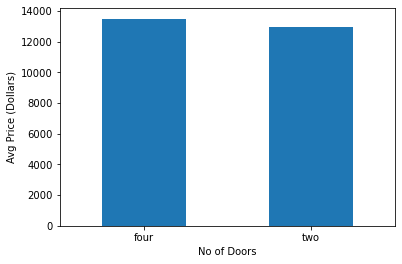

In [43]:
df_door_avg_price = df[['doornumber','price']].groupby("doornumber", as_index = False).mean().rename(columns={'price':'door_avg_price'})
plt1 = df_door_avg_price.plot(x = 'doornumber', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("No of Doors")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

In [44]:
# Inference
# Number of doors doesn't seem to have much effect on price.

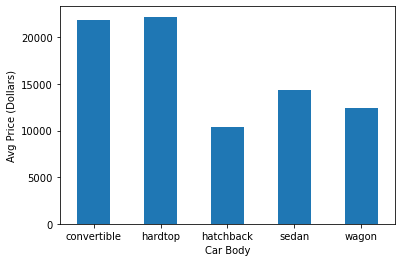

In [45]:
df_body_avg_price = df[['carbody','price']].groupby("carbody", as_index = False).mean().rename(columns={'price':'carbody_avg_price'})
plt1 = df_body_avg_price.plot(x = 'carbody', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Car Body")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

In [46]:
# Inference 
# Hardtop and convertible are the most expensive whereas hatchbacks are the cheapest.

Drivewheel

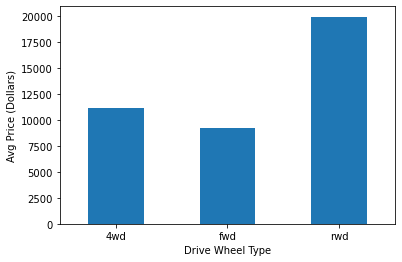

In [47]:
df_drivewheel_avg_price = df[['drivewheel','price']].groupby("drivewheel", as_index = False).mean().rename(columns={'price':'drivewheel_avg_price'})
plt1 = df_drivewheel_avg_price.plot(x = 'drivewheel', kind='bar', sort_columns = True,legend = False,)
plt1.set_xlabel("Drive Wheel Type")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

In [48]:
# Inference
# Cars with Rear wheel drive have a higher price value.

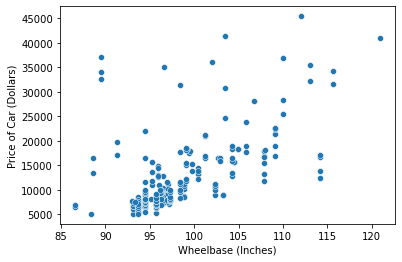

In [49]:
plt1 = sns.scatterplot(x = 'wheelbase', y = 'price', data = df)
plt1.set_xlabel('Wheelbase (Inches)')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

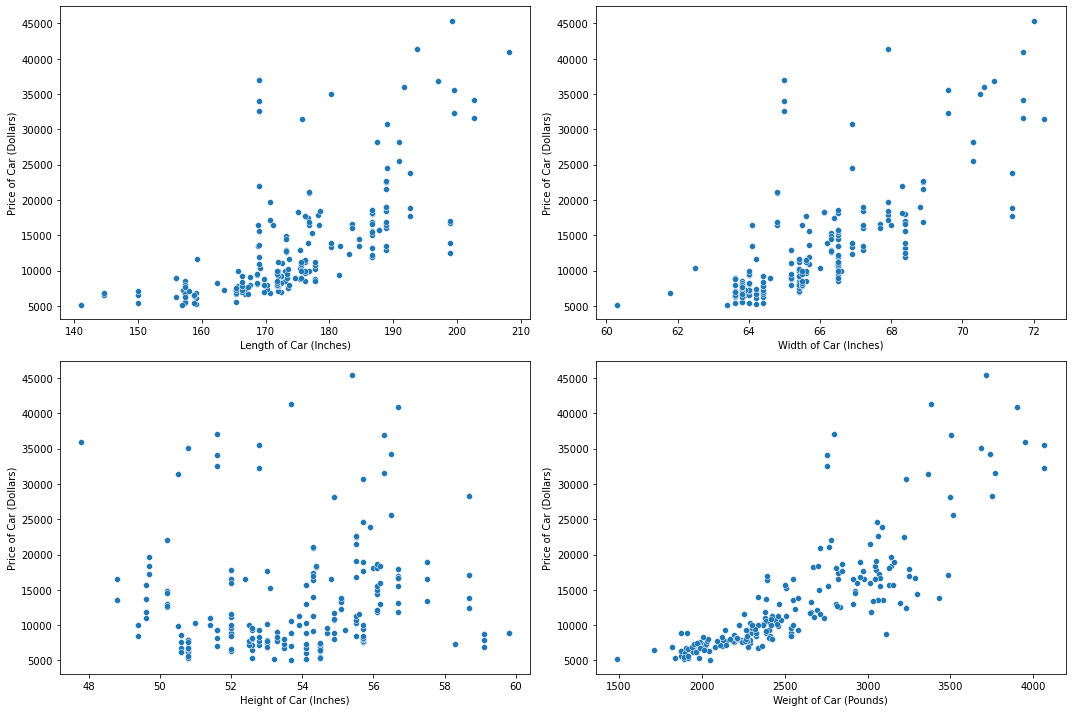

In [50]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
plt1 = sns.scatterplot(x = 'carlength', y = 'price', data = df, ax = axs[0,0])
plt1.set_xlabel('Length of Car (Inches)')
plt1.set_ylabel('Price of Car (Dollars)')
plt2 = sns.scatterplot(x = 'carwidth', y = 'price', data = df, ax = axs[0,1])
plt2.set_xlabel('Width of Car (Inches)')
plt2.set_ylabel('Price of Car (Dollars)')
plt3 = sns.scatterplot(x = 'carheight', y = 'price', data = df, ax = axs[1,0])
plt3.set_xlabel('Height of Car (Inches)')
plt3.set_ylabel('Price of Car (Dollars)')
plt3 = sns.scatterplot(x = 'curbweight', y = 'price', data = df, ax = axs[1,1])
plt3.set_xlabel('Weight of Car (Pounds)')
plt3.set_ylabel('Price of Car (Dollars)')
plt.tight_layout()

# Inference
# Length width and weight of the car is positively related with the price.
# There is not much of a correlation with Height of the car with price.
Engine Specifications
Engine Type, Cylinder, Fuel System

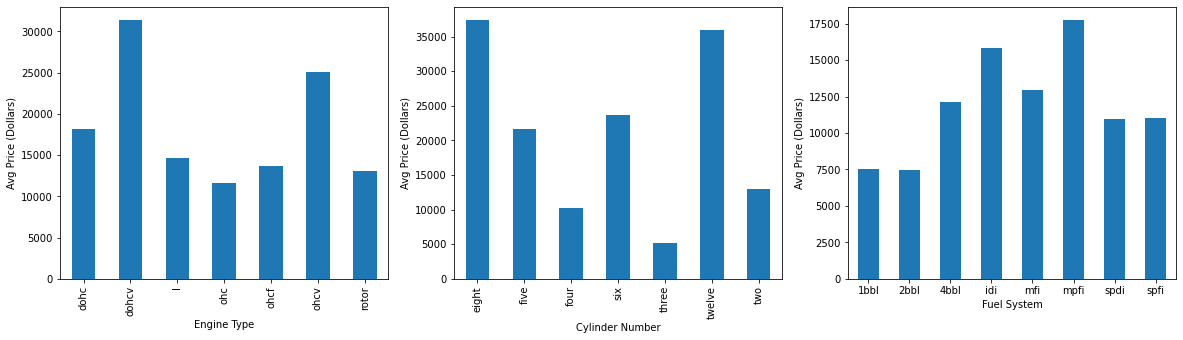

In [51]:
fig, axs = plt.subplots(1,3,figsize=(20,5))
#
df_engine_avg_price = df[['enginetype','price']].groupby("enginetype", as_index = False).mean().rename(columns={'price':'engine_avg_price'})
plt1 = df_engine_avg_price.plot(x = 'enginetype', kind='bar', sort_columns = True, legend = False, ax = axs[0])
plt1.set_xlabel("Engine Type")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
#
df_cylindernumber_avg_price = df[['cylindernumber','price']].groupby("cylindernumber", as_index = False).mean().rename(columns={'price':'cylindernumber_avg_price'})
plt1 = df_cylindernumber_avg_price.plot(x = 'cylindernumber', kind='bar', sort_columns = True,legend = False, ax = axs[1])
plt1.set_xlabel("Cylinder Number")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
#
df_fuelsystem_avg_price = df[['fuelsystem','price']].groupby("fuelsystem", as_index = False).mean().rename(columns={'price':'fuelsystem_avg_price'})
plt1 = df_fuelsystem_avg_price.plot(x = 'fuelsystem', kind='bar', sort_columns = True,legend = False, ax = axs[2])
plt1.set_xlabel("Fuel System")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

In [52]:
# Inference
# DOHCV and OHCV engine types are priced high.
# Eight and twelve cylinder cars have higher price.
# IDI and MPFI fuel system have higher price.

Engine Size, Bore Ratio, Stroke, Horsepower & Compression Ratio

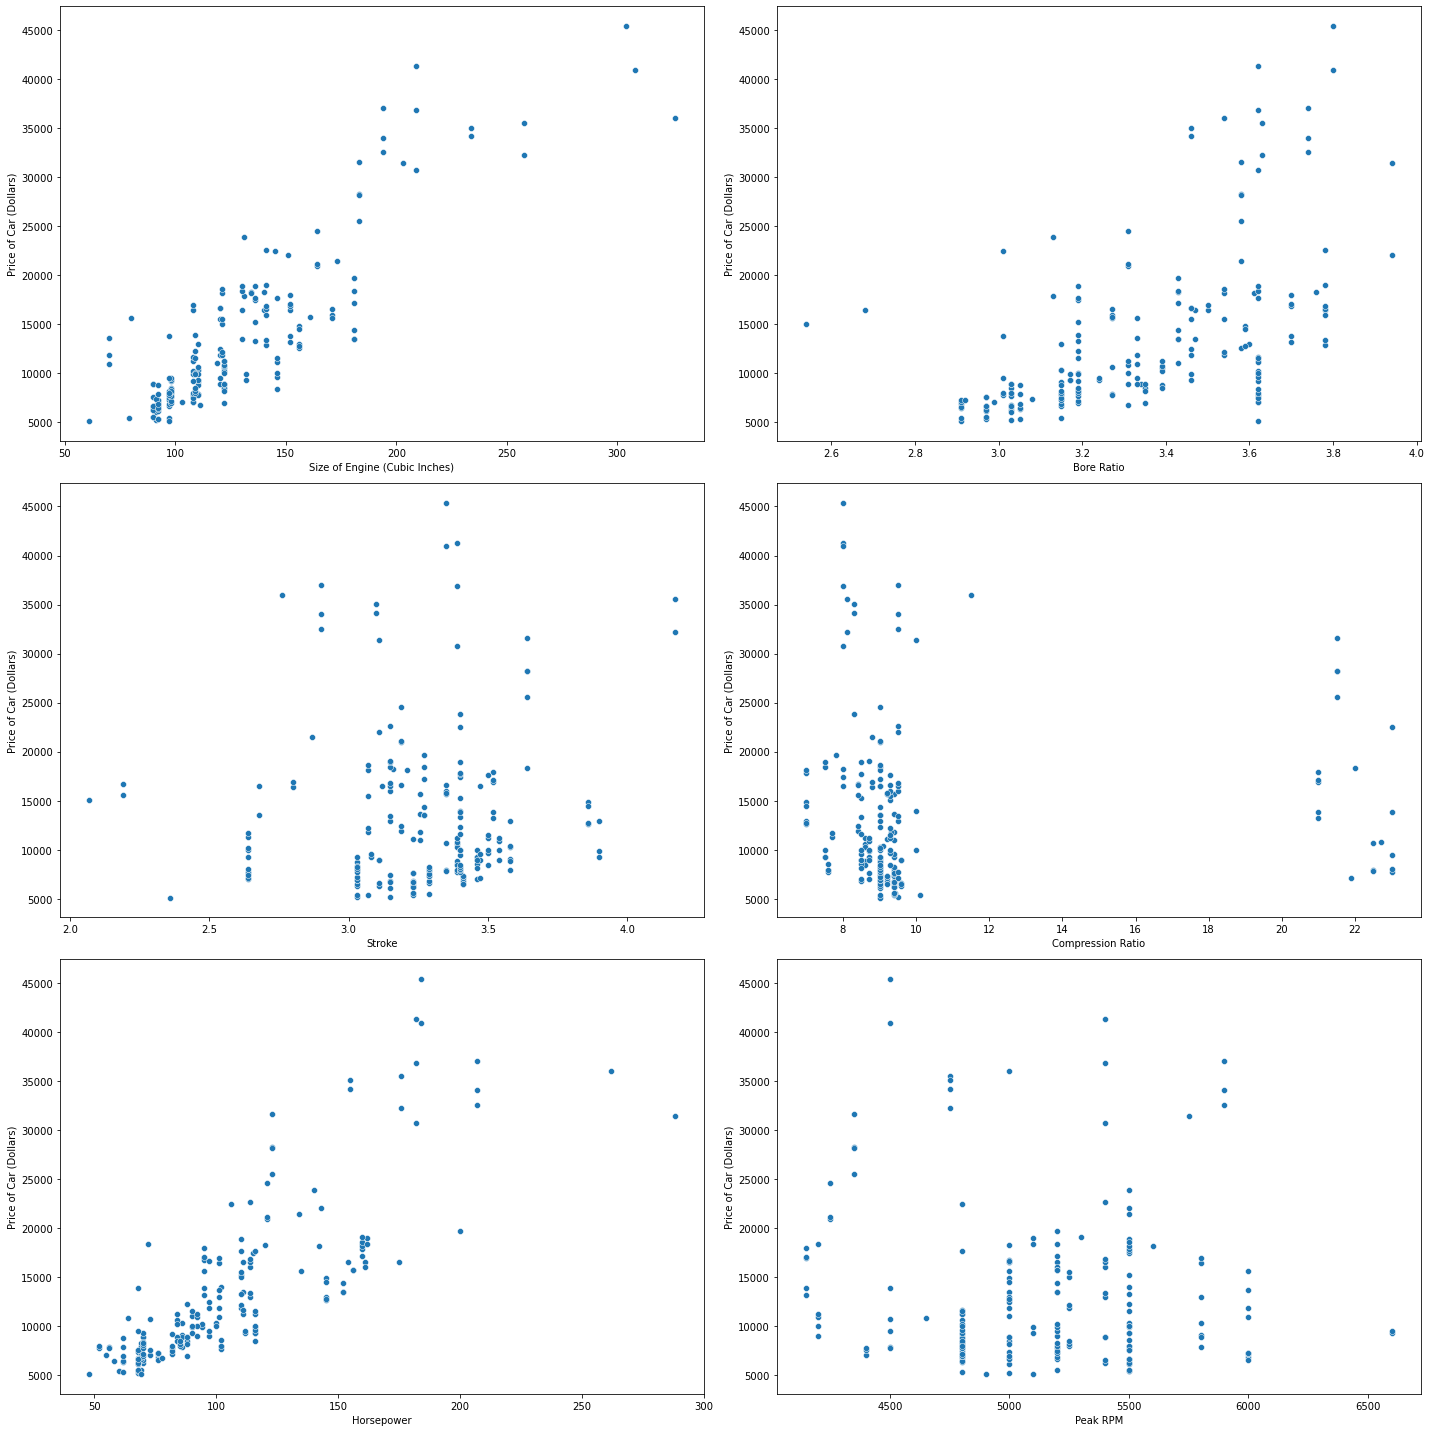

In [53]:
fig, axs = plt.subplots(3,2,figsize=(20,20))
#
plt1 = sns.scatterplot(x = 'enginesize', y = 'price', data = df, ax = axs[0,0])
plt1.set_xlabel('Size of Engine (Cubic Inches)')
plt1.set_ylabel('Price of Car (Dollars)')
#
plt2 = sns.scatterplot(x = 'boreratio', y = 'price', data = df, ax = axs[0,1])
plt2.set_xlabel('Bore Ratio')
plt2.set_ylabel('Price of Car (Dollars)')
#
plt3 = sns.scatterplot(x = 'stroke', y = 'price', data = df, ax = axs[1,0])
plt3.set_xlabel('Stroke')
plt3.set_ylabel('Price of Car (Dollars)')
#
plt4 = sns.scatterplot(x = 'compressionratio', y = 'price', data = df, ax = axs[1,1])
plt4.set_xlabel('Compression Ratio')
plt4.set_ylabel('Price of Car (Dollars)')
#
plt5 = sns.scatterplot(x = 'horsepower', y = 'price', data = df, ax = axs[2,0])
plt5.set_xlabel('Horsepower')
plt5.set_ylabel('Price of Car (Dollars)')
#
plt5 = sns.scatterplot(x = 'peakrpm', y = 'price', data = df, ax = axs[2,1])
plt5.set_xlabel('Peak RPM')
plt5.set_ylabel('Price of Car (Dollars)')
plt.tight_layout()
plt.show()

City Mileage & Highway Mileage

In [54]:
# A single variable mileage can be calculated taking the weighted average of 55% city and 45% highways.

In [55]:
df['mileage'] = df['citympg']*0.55 + df['highwaympg']*0.45

In [56]:
# Let's see how price varies with mileage

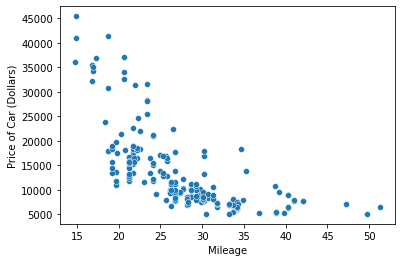

In [57]:
plt1 = sns.scatterplot(x = 'mileage', y = 'price', data = df)
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

# Inference 
# Mileage has a negative correlation with price.
Bivariate Analysis
Brand Category - Mileage

In [58]:
# It is expected that luxury brands don't care about mileage. Let's find out how price varies with brand category and mileage.

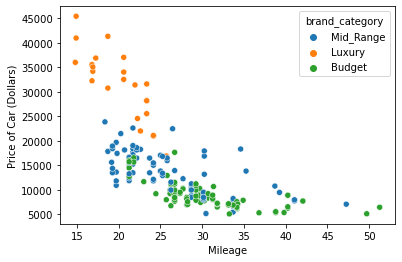

In [59]:
plt1 = sns.scatterplot(x = 'mileage', y = 'price', hue = 'brand_category', data = df)
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

Brand Category - Horsepower

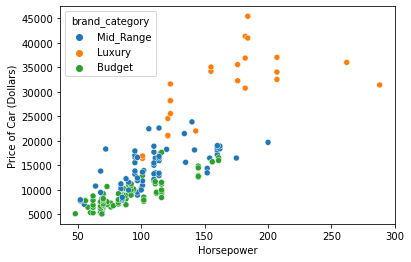

In [60]:
plt1 = sns.scatterplot(x = 'horsepower', y = 'price', hue = 'brand_category', data = df)
plt1.set_xlabel('Horsepower')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

Mileage - Fuel Type

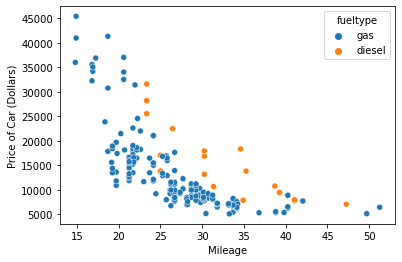

In [61]:
plt1 = sns.scatterplot(x = 'mileage', y = 'price', hue = 'fueltype', data = df)
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

Horsepower - Fuel Type

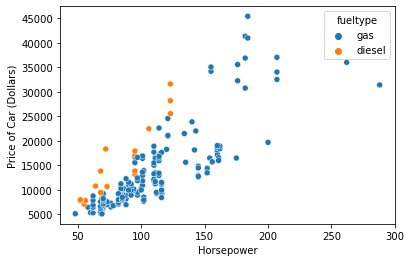

In [62]:
plt1 = sns.scatterplot(x = 'horsepower', y = 'price', hue = 'fueltype', data = df)
plt1.set_xlabel('Horsepower')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

In [63]:
auto = df[['fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize',  'boreratio', 'horsepower', 'price', 'brand_category', 'mileage']]

In [64]:
auto.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,price,brand_category,mileage
0,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,13495.0,Mid_Range,23.70
1,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,16500.0,Mid_Range,23.70
2,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,16500.0,Mid_Range,22.15
3,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,13950.0,Mid_Range,26.70
4,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,17450.0,Mid_Range,19.80


Visualising the Data
Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

<Figure size 1080x1080 with 0 Axes>

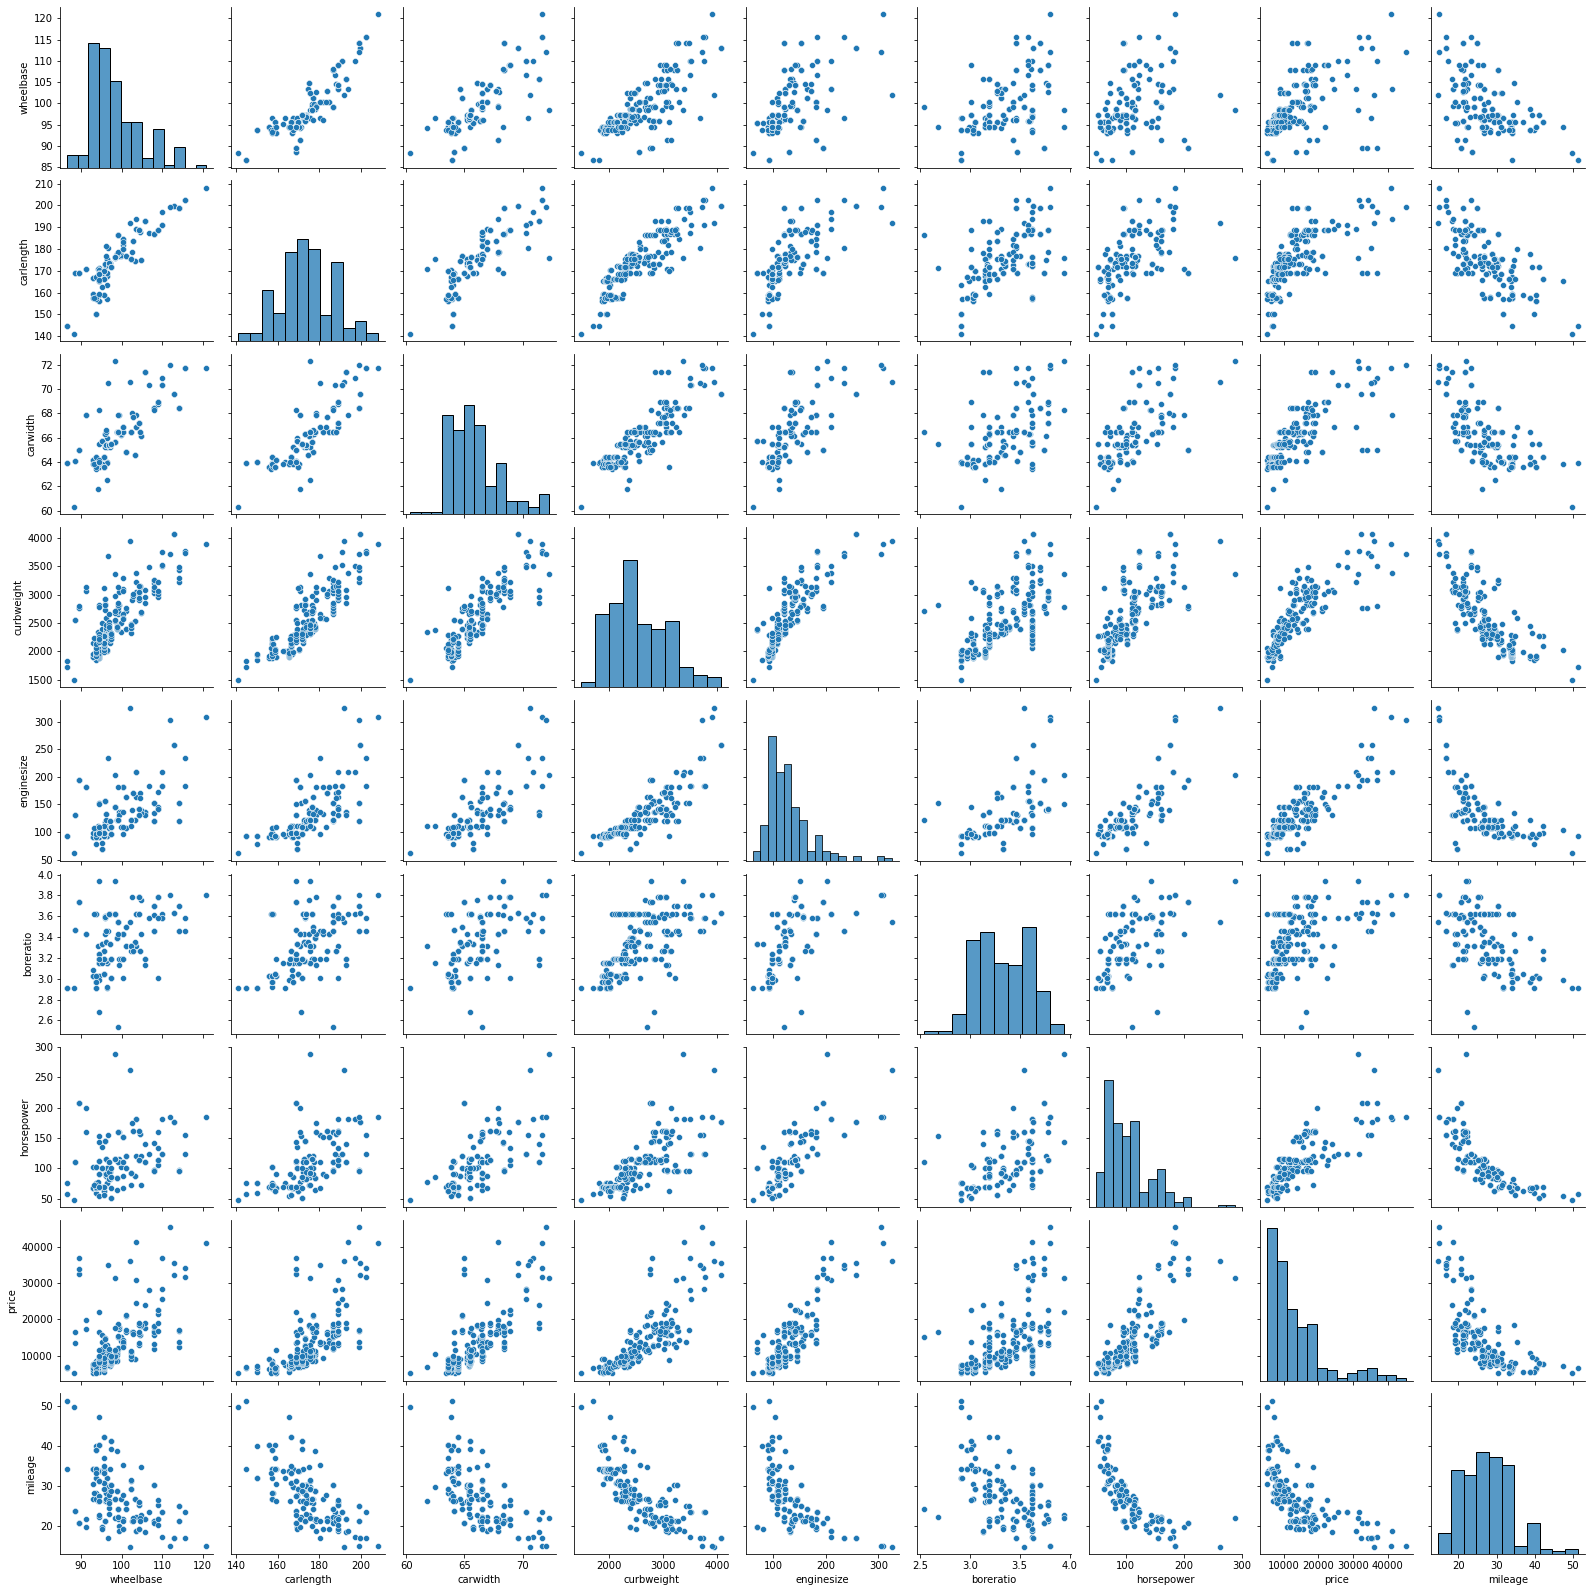

In [65]:
plt.figure(figsize=(15, 15))
sns.pairplot(auto)
plt.show()

Visualising Categorical Variables
Let's make a boxplot for categorical variables

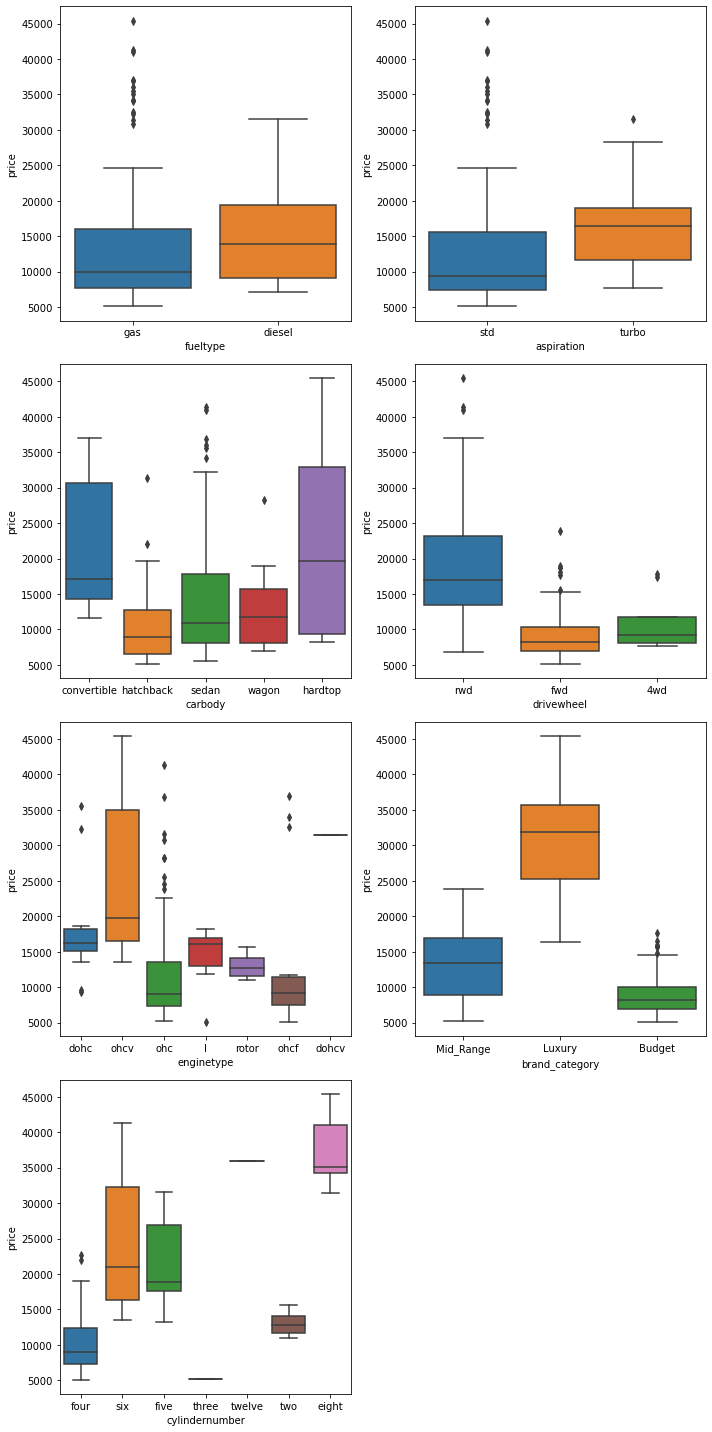

In [66]:
plt.figure(figsize=(10, 20))
plt.subplot(4,2,1)
sns.boxplot(x = 'fueltype', y = 'price', data = auto)
plt.subplot(4,2,2)
sns.boxplot(x = 'aspiration', y = 'price', data = auto)
plt.subplot(4,2,3)
sns.boxplot(x = 'carbody', y = 'price', data = auto)
plt.subplot(4,2,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = auto)
plt.subplot(4,2,5)
sns.boxplot(x = 'enginetype', y = 'price', data = auto)
plt.subplot(4,2,6)
sns.boxplot(x = 'brand_category', y = 'price', data = auto)
plt.subplot(4,2,7)
sns.boxplot(x = 'cylindernumber', y = 'price', data = auto)
plt.tight_layout()
plt.show()

Data Preparation


Dummy Variables

In [67]:
# Categorical Variables are converted into Neumerical Variables with the help of Dummy Variable 

In [68]:
cyl_no = pd.get_dummies(auto['cylindernumber'], drop_first = True)

In [69]:
auto = pd.concat([auto, cyl_no], axis = 1)

In [70]:
brand_cat = pd.get_dummies(auto['brand_category'], drop_first = True)

In [71]:
auto = pd.concat([auto, brand_cat], axis = 1)

In [72]:
eng_typ = pd.get_dummies(auto['enginetype'], drop_first = True)

In [73]:
auto = pd.concat([auto, eng_typ], axis = 1)

In [74]:
drwh = pd.get_dummies(auto['drivewheel'], drop_first = True)

In [75]:
auto = pd.concat([auto, drwh], axis = 1)

In [76]:
carb = pd.get_dummies(auto['carbody'], drop_first = True)

In [77]:
auto = pd.concat([auto, carb], axis = 1)

In [78]:
asp = pd.get_dummies(auto['aspiration'], drop_first = True)

In [79]:
auto = pd.concat([auto, asp], axis = 1)

In [80]:
fuelt = pd.get_dummies(auto['fueltype'], drop_first = True)

In [81]:
auto = pd.concat([auto, fuelt], axis = 1)

In [82]:
auto.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber','brand_category'], axis = 1, inplace = True)

Model Building
Splitting the Data into Training and Testing sets

In [83]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(auto, train_size = 0.7, test_size = 0.3, random_state = 100)

Rescaling the Features

In [84]:
# We will use min-max scaling

In [85]:
from sklearn.preprocessing import MinMaxScaler

In [86]:
scaler = MinMaxScaler()

In [87]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize','boreratio', 'horsepower', 'price','mileage']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [88]:
df_train.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage,five,...,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
122,0.244828,0.426016,0.291667,0.272692,0.139623,0.230159,0.083333,0.068818,0.530864,0,...,0,0,1,0,0,0,1,0,0,1
125,0.272414,0.452033,0.666667,0.500388,0.339623,1.000000,0.395833,0.466890,0.213992,0,...,0,0,0,1,0,1,0,0,0,1
166,0.272414,0.448780,0.308333,0.314973,0.139623,0.444444,0.266667,0.122110,0.344307,0,...,0,0,0,1,0,1,0,0,0,1
1,0.068966,0.450407,0.316667,0.411171,0.260377,0.626984,0.262500,0.314446,0.244170,0,...,0,0,0,1,0,0,0,0,0,1
199,0.610345,0.775610,0.575000,0.647401,0.260377,0.746032,0.475000,0.382131,0.122085,0,...,0,0,0,1,0,0,0,1,1,1


In [89]:
df_train.describe()


,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage,five,...,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.411141,0.525476,0.461655,0.407878,0.241351,0.497946,0.227302,0.219310,0.358265,0.062937,...,0.062937,0.027972,0.594406,0.349650,0.020979,0.342657,0.475524,0.132867,0.181818,0.909091
std,0.205581,0.204848,0.184517,0.211269,0.154619,0.207140,0.165511,0.215682,0.185980,0.243703,...,0.243703,0.165472,0.492733,0.478536,0.143818,0.476266,0.501156,0.340624,0.387050,0.288490
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272414,0.399187,0.304167,0.245539,0.135849,0.305556,0.091667,0.067298,0.198903,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.341379,0.502439,0.425000,0.355702,0.184906,0.500000,0.191667,0.140343,0.344307,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.503448,0.669919,0.550000,0.559542,0.301887,0.682540,0.283333,0.313479,0.512346,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


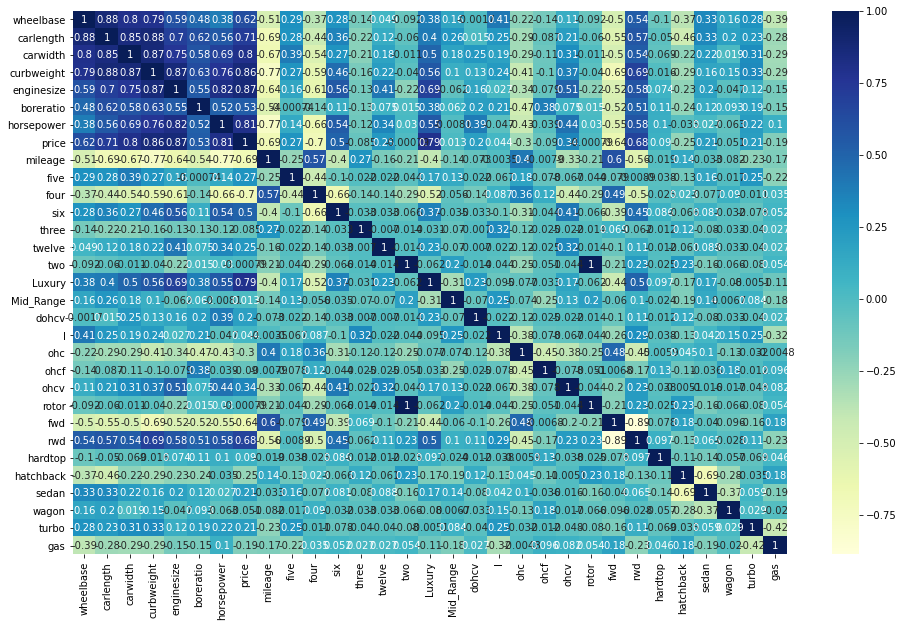

In [90]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [91]:
y_train = df_train.pop('price')
X_train = df_train

RFE
Recursive feature elimination

In [92]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [93]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 3),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('curbweight', True, 1),
 ('enginesize', False, 13),
 ('boreratio', False, 10),
 ('horsepower', True, 1),
 ('mileage', True, 1),
 ('five', False, 6),
 ('four', False, 4),
 ('six', False, 5),
 ('three', False, 14),
 ('twelve', True, 1),
 ('two', False, 21),
 ('Luxury', True, 1),
 ('Mid_Range', False, 12),
 ('dohcv', True, 1),
 ('l', False, 19),
 ('ohc', False, 7),
 ('ohcf', False, 8),
 ('ohcv', False, 9),
 ('rotor', False, 20),
 ('fwd', False, 16),
 ('rwd', False, 15),
 ('hardtop', False, 2),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('turbo', False, 18),
 ('gas', False, 17)]

In [94]:
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'horsepower', 'mileage', 'twelve', 'Luxury',
       'dohcv', 'hatchback', 'sedan', 'wagon'],
      dtype='object')

In [96]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [97]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [98]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [99]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     172.1
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           1.29e-70
Time:                        17:11:47   Log-Likelihood:                 205.85
No. Observations:                 143   AIC:                            -389.7
Df Residuals:                     132   BIC:                            -357.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0947      0.042     -2.243      0.0

In [100]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,71.51
2,curbweight,8.38
9,sedan,6.18
3,horsepower,5.94
8,hatchback,5.68
1,carwidth,5.19
4,mileage,3.74
10,wagon,3.62
7,dohcv,1.73
6,Luxury,1.68


In [101]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,71.51
2,curbweight,8.38
9,sedan,6.18
3,horsepower,5.94
8,hatchback,5.68
1,carwidth,5.19
4,mileage,3.74
10,wagon,3.62
7,dohcv,1.73
6,Luxury,1.68


In [102]:
# This leaves mileage insignificant.


In [104]:
# Dropping curbweight as p-value is high.
X_train_new1 = X_train_rfe.drop(["twelve"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new1)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     187.9
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           4.25e-71
Time:                        17:14:14   Log-Likelihood:                 204.17
No. Observations:                 143   AIC:                            -388.3
Df Residuals:                     133   BIC:                            -358.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0764      0.041     -1.851      0.0

In [105]:
# This leaves mileage insignificant

In [106]:
# Dropping hardtop as p value is high.
X_train_new2 = X_train_new1.drop(["mileage"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new2)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     209.5
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           7.86e-72
Time:                        17:14:35   Log-Likelihood:                 203.07
No. Observations:                 143   AIC:                            -388.1
Df Residuals:                     134   BIC:                            -361.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0305      0.026     -1.165      0.2

In [107]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,26.90
2,curbweight,8.10
7,sedan,6.07
6,hatchback,5.63
1,carwidth,5.14
3,horsepower,3.61
8,wagon,3.58
4,Luxury,1.63
5,dohcv,1.46


In [108]:
# Dropping mileage as p-value is high.
X_train_new3 = X_train_new2.drop(["curbweight"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new3)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           4.70e-70
Time:                        17:15:05   Log-Likelihood:                 195.77
No. Observations:                 143   AIC:                            -375.5
Df Residuals:                     135   BIC:                            -351.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0319      0.027     -1.161      0.2

In [109]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,26.89
6,sedan,6.06
5,hatchback,5.54
7,wagon,3.47
2,horsepower,2.50
1,carwidth,2.22
3,Luxury,1.56
4,dohcv,1.21


In [110]:
# Dropping sedan as VIF value is high.
X_train_new4 = X_train_new3.drop(["sedan"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new4)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     237.6
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           1.68e-69
Time:                        17:15:25   Log-Likelihood:                 191.46
No. Observations:                 143   AIC:                            -368.9
Df Residuals:                     136   BIC:                            -348.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0934      0.018     -5.219      0.0

In [111]:
# Dropping wagon as p value is high.
X_train_new5 = X_train_new4.drop(["wagon"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new5)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           1.57e-70
Time:                        17:15:48   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0970      0.018     -5.530      0.0

In [112]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.39
2,horsepower,2.39
1,carwidth,2.08
3,Luxury,1.53
4,dohcv,1.21
5,hatchback,1.13


In [113]:
# Dropping dohcv to see if any change in model.
X_train_new6 = X_train_new5.drop(["dohcv"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new6)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           1.04e-67
Time:                        17:16:10   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0824      0.018     -4.480      0.0

Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [114]:
y_train_price = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

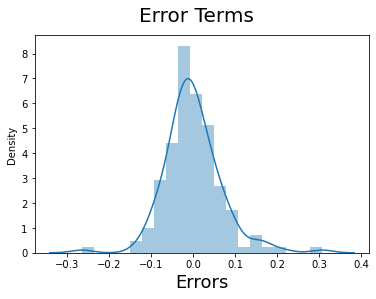

In [115]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     

Making Predictions
Applying the scaling on the test sets

In [116]:
num_vars = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize','boreratio', 'horsepower', 'price','mileage']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [117]:
y_test = df_test.pop('price')
X_test = df_test


In [118]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[['carwidth', 'horsepower', 'Luxury', 'hatchback']]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [119]:
# Making predictions
y_pred = lm.predict(X_test_new)

Model Evaluation

In [120]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8986678382302791

Text(0, 0.5, 'y_pred')

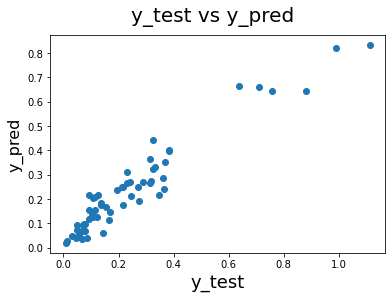

In [121]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

We can see that the equation of our best fitted line is:
price = 0.3957 carwidth + 0.4402 horsepower + 0.2794 luxury -0.0414 hatchback -0.0824